In [1]:
import numpy as numpy
from numpy import ndarray
from matplotlib.legend import Legend
from matplotlib import pyplot as pyplot

# Extract H2O-PEG(O) RDF histogram data for unstretched & stretched PEG

In [2]:
rdf_path: str = '../data/raw/rdf-vs-time/'
# File contains columns of data, the .T transpose operation switches them to rows, making it easier to
# unpack into separate variables
# Extract H2O-PEG(O) unstretched PEG RDF histogram data
(unstretched_bin, unstretched_distance, unstretched_bin_rdf,
 unstretched_bin_coordination_number, unstretched_bin_cumulative_coordination_number,
 unstretched_bin_atom_pairs_histo) = numpy.genfromtxt(
    rdf_path + 'ave_PEG_H2O_RDF_initial.dat',
    skip_header=4,
    usecols=range(6)
).T

# Extract H2O-PEG(O) stretched PEG RDF histogram data
(stretched_bin, stretched_distance, stretched_bin_rdf,
 stretched_bin_coordination_number, stretched_bin_cumulative_coordination_number,
 stretched_bin_atom_pairs_histo) = numpy.genfromtxt(
    rdf_path + 'ave_PEG_H2O_RDF_final.dat',
    skip_header=4,
    usecols=range(6)
).T

# Create Matplotlib graph to plot H2O-PEG(O) RDF vs distance

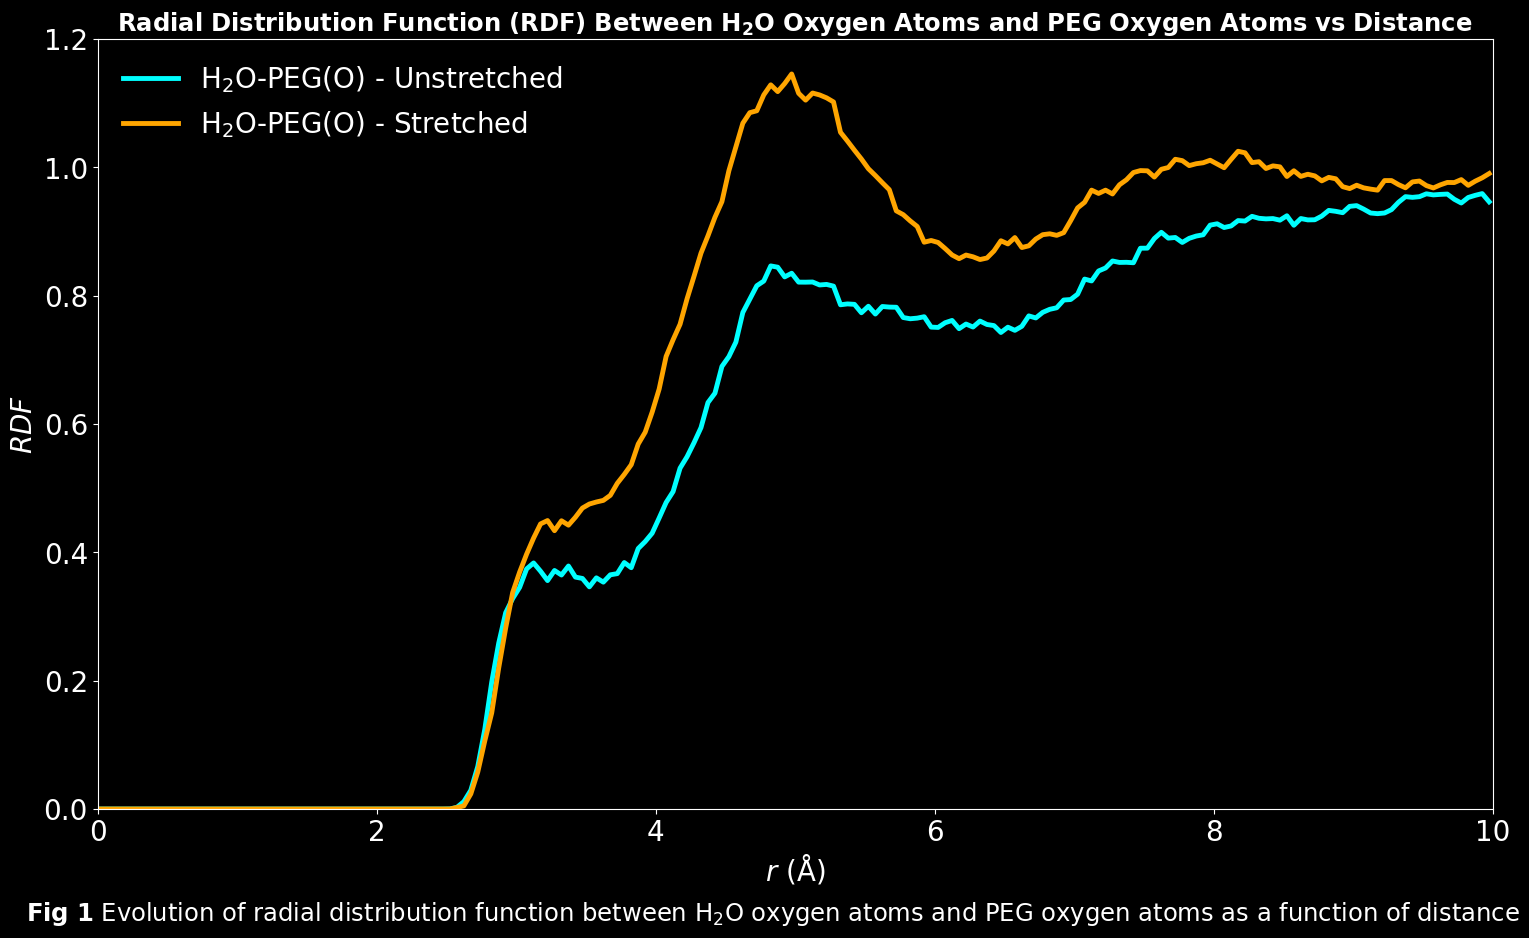

In [3]:
# Set up the line graph
rdf_vs_distance_line_graph, rdf_vs_distance_line_graph_axes = pyplot.subplots(figsize=(18, 10))
rdf_vs_distance_line_graph.patch.set_facecolor('black')
rdf_vs_distance_line_graph_axes.set_facecolor('black')

# Stylise ticks and spines
rdf_vs_distance_line_graph_axes.tick_params(colors='white', which='both', labelsize=20)
for spine in rdf_vs_distance_line_graph_axes.spines.values():
    spine.set_edgecolor('white')

# Plot the data
rdf_vs_distance_line_graph_axes.plot(unstretched_distance, unstretched_bin_rdf, color='cyan', 
                                     linewidth=3.5, label=r'H$_{2}$O-PEG(O) - Unstretched')
rdf_vs_distance_line_graph_axes.plot(stretched_distance, stretched_bin_rdf, color='orange', 
                                     linewidth=3.5, label=r'H$_{2}$O-PEG(O) - Stretched')

# Set axes labels, limits and graph title
rdf_vs_distance_line_graph_axes.set_xlabel(r'$r$ (Å)', color='white', fontsize=20)
rdf_vs_distance_line_graph_axes.set_ylabel(r'$RDF$', color='white', fontsize=20)
rdf_vs_distance_line_graph_axes.set_xlim(0, 10)
rdf_vs_distance_line_graph_axes.set_ylim(0.0, 1.2)
rdf_vs_distance_line_graph_axes.set_title(
    r'$\bf{Radial\ Distribution\ Function\ (RDF)\ Between\ H_{2}O\ Oxygen\ Atoms\ and\ PEG\ Oxygen\ '
    r'Atoms\ vs\ Distance}$', fontsize=17.5, color='white'
)

# Add legend
legend: Legend = rdf_vs_distance_line_graph_axes.legend(loc='upper left', frameon=False, fontsize=20)
for text in legend.get_texts():
    text.set_color('white')

# Add figure title
rdf_vs_distance_line_graph.text(0.5, 0.005,
                r'$\bf{Fig\ 1}$ Evolution of radial distribution function between H$_{2}$O oxygen atoms and PEG oxygen '
                r'atoms as a function of distance',
                ha='center', va='center', color='white', fontsize=17.5)

# Save & display the plot
pyplot.savefig('../reports/figures/graphs/H2O_PEG_rdf_vs_distance.png', bbox_inches='tight')
pyplot.show()